<a href="https://colab.research.google.com/github/saransarvesh/ALY-6110/blob/main/Module_4_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [161]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [166]:
from google.colab import files
upload = files.upload()

Saving h.csv to h.csv


In [167]:
## dataset reading
df = spark.read.csv('h.csv', inferSchema=True, header = True)

In [168]:
df.show(5)

+-----+------+-------+---+-------+-----------+------------+------------------+--------------+--------+-----------------+----------+------------+-------------+----+-----------+-----------------------+------------------------+----------------+-----------+-----------+------------+-----------+-----------+-----------+-----------+------+-----------+-----------+---------+-----------+---------+----------+-----------+-----------+---------+---------------+-----------+-------------+-----------+---------------+------------+-------------+-----------+-----------+-------------+-----+-----------+-----------+----+---+
|group|    ID|outcome|age|gendera|        BMI|hypertensive|atrialfibrillation|CHD with no MI|diabetes|deficiencyanemias|depression|Hyperlipemia|Renal failure|COPD| heart rate|Systolic blood pressure|Diastolic blood pressure|Respiratory rate|temperature|      SP O2|Urine output| hematocrit|        RBC|        MCH|       MCHC|   MCV|        RDW|  Leucocyte|Platelets|Neutrophils|Basophils|Ly

In [170]:
row=df.count()

In [171]:
row

1177

In [172]:
df.printSchema()

root
 |-- group: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- outcome: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gendera: integer (nullable = true)
 |-- BMI: string (nullable = true)
 |-- hypertensive: integer (nullable = true)
 |-- atrialfibrillation: integer (nullable = true)
 |-- CHD with no MI: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- deficiencyanemias: integer (nullable = true)
 |-- depression: integer (nullable = true)
 |-- Hyperlipemia: integer (nullable = true)
 |-- Renal failure: integer (nullable = true)
 |-- COPD: integer (nullable = true)
 |-- heart rate: string (nullable = true)
 |-- Systolic blood pressure: string (nullable = true)
 |-- Diastolic blood pressure: string (nullable = true)
 |-- Respiratory rate: string (nullable = true)
 |-- temperature: string (nullable = true)
 |-- SP O2: string (nullable = true)
 |-- Urine output: string (nullable = true)
 |-- hematocrit: double (nullable = true)


In [173]:
df.describe().show()

+-------+-------------------+------------------+-------------------+------------------+-------------------+-----------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-----------------------+------------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+
|summ

In [175]:
##subsetting data frame
df1 = df.select(df['Renal failure'],df['Systolic blood pressure'],df['Blood potassium'],df['heart rate'],df['hematocrit'],df['Urine output'],df['Urea nitrogen'],df['Creatinine'],df['hypertensive'],df['diabetes'],df['deficiencyanemias'],df['Lactic acid'],df['EF'])
                                            

In [176]:
df1.show()

+-------------+-----------------------+---------------+-----------+-----------+------------+-------------+-----------+------------+--------+-----------------+-----------+---+
|Renal failure|Systolic blood pressure|Blood potassium| heart rate| hematocrit|Urine output|Urea nitrogen| Creatinine|hypertensive|diabetes|deficiencyanemias|Lactic acid| EF|
+-------------+-----------------------+---------------+-----------+-----------+------------+-------------+-----------+------------+--------+-----------------+-----------+---+
|            1|            155.8666667|    4.816666667|68.83783784|26.27272727|        2155|         50.0|1.958333333|           0|       1|                1|        0.5| 55|
|            0|                    140|           4.45|          0|      30.78|        1425|  20.33333333|1.122222222|           0|       0|                1|        0.5| 55|
|            1|            135.3333333|          5.825|72.31818182|       27.7|        2425|  33.85714286|1.871428571|       

In [179]:
## string to integer
from pyspark.sql.types import IntegerType
df1 = df1.withColumn("heart rate", df1["heart rate"].cast(IntegerType()))
df1 = df1.withColumn("Systolic blood pressure", df1["Systolic blood pressure"].cast(IntegerType()))
df1 = df1.withColumn("Urine output", df1["Urine output"].cast(IntegerType()))
df1 = df1.withColumn("Lactic acid", df1["Lactic acid"].cast(IntegerType()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00d3a16050>,
      dtype=object)

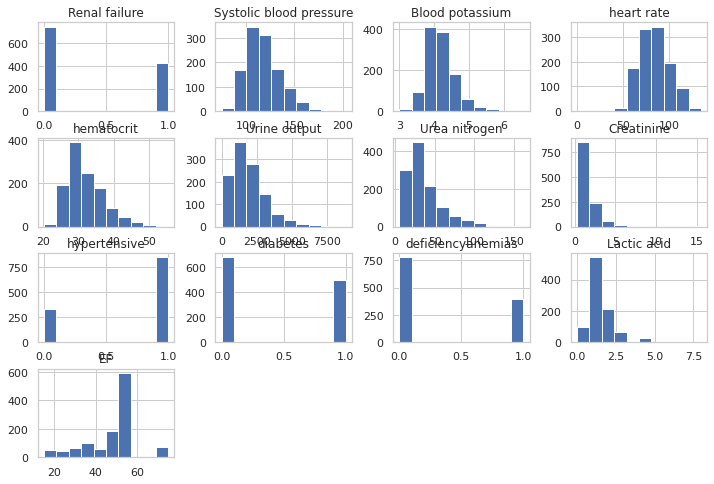

In [250]:
df2.hist()

In [243]:
## replacing NA values with mean
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols = ['EF','heart rate'],
    outputCols = ["{}_imputed".format(a) for a in ['EF','heart rate'] ]
).setStrategy("mean")

In [244]:
imputer.fit(df1).transform(df1).show()

+-------------+-----------------------+---------------+----------+-----------+------------+-------------+-----------+------------+--------+-----------------+-----------+---+----------+------------------+
|Renal failure|Systolic blood pressure|Blood potassium|heart rate| hematocrit|Urine output|Urea nitrogen| Creatinine|hypertensive|diabetes|deficiencyanemias|Lactic acid| EF|EF_imputed|heart rate_imputed|
+-------------+-----------------------+---------------+----------+-----------+------------+-------------+-----------+------------+--------+-----------------+-----------+---+----------+------------------+
|            1|                    155|    4.816666667|        68|26.27272727|        2155|         50.0|1.958333333|           0|       1|                1|          0| 55|        55|                68|
|            0|                    140|           4.45|         0|      30.78|        1425|  20.33333333|1.122222222|           0|       0|                1|          0| 55|        55|

In [245]:
## replacing NA values with median
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols = ['Systolic blood pressure','Blood potassium','hematocrit','Urine output','Urea nitrogen','Creatinine','Lactic acid'],
    outputCols = ["{}_imputed".format(a) for a in ['Systolic blood pressure','Blood potassium','hematocrit','Urine output','Urea nitrogen','Creatinine','Lactic acid'] ]
).setStrategy("median")

In [246]:
imputer.fit(df1).transform(df1).show()

+-------------+-----------------------+---------------+----------+-----------+------------+-------------+-----------+------------+--------+-----------------+-----------+---+-----------------------+-------------------+---------------------+------------------+-------------------------------+------------------+--------------------+
|Renal failure|Systolic blood pressure|Blood potassium|heart rate| hematocrit|Urine output|Urea nitrogen| Creatinine|hypertensive|diabetes|deficiencyanemias|Lactic acid| EF|Blood potassium_imputed|Lactic acid_imputed|Urea nitrogen_imputed|Creatinine_imputed|Systolic blood pressure_imputed|hematocrit_imputed|Urine output_imputed|
+-------------+-----------------------+---------------+----------+-----------+------------+-------------+-----------+------------+--------+-----------------+-----------+---+-----------------------+-------------------+---------------------+------------------+-------------------------------+------------------+--------------------+
|      

In [182]:
df1.columns

['Renal failure',
 'Systolic blood pressure',
 'Blood potassium',
 'heart rate',
 'hematocrit',
 'Urine output',
 'Urea nitrogen',
 'Creatinine',
 'hypertensive',
 'diabetes',
 'deficiencyanemias',
 'Lactic acid',
 'EF']

In [183]:
## correlation between columns
from pyspark.sql.functions import *
df1.stat.corr('Renal failure','Systolic blood pressure')

0.00979417632677677

In [184]:
df1.stat.corr('Renal failure','Urine output')


-0.09840557394848197

In [185]:
df1.stat.corr('Renal failure','Blood potassium')

0.16147840703754499

In [186]:
df1.stat.corr('Renal failure','heart rate')

-0.21690995881326033

In [187]:
df1.stat.corr('Renal failure','hematocrit')

-0.16061484730591266

In [188]:
df1.stat.corr('Renal failure','Urea nitrogen')

0.42451675566739433

In [189]:
df1.stat.corr('Renal failure','Creatinine')

0.4504272403958255

In [190]:
df1.stat.corr('Renal failure','hypertensive')

0.19326617763888462

In [191]:
df1.stat.corr('Renal failure','diabetes')

0.18864632442931786

In [192]:
df1.stat.corr('Renal failure','deficiencyanemias')

0.14995727915653878

In [193]:
df1.stat.corr('Renal failure','Lactic acid')

-0.10469520284173506

In [196]:
df1.stat.corr('Renal failure','EF')


-0.10159102907138438

In [208]:
df2 =df1.toPandas()
print(df2)

      Renal failure  Systolic blood pressure  Blood potassium  heart rate  \
0                 1                    155.0         4.816667        68.0   
1                 0                    140.0         4.450000         0.0   
2                 1                    135.0         5.825000        72.0   
3                 0                    126.0         4.386667        94.0   
4                 1                    156.0         4.783333        67.0   
...             ...                      ...              ...         ...   
1172              1                    142.0         5.557143       100.0   
1173              1                    101.0         4.520000       114.0   
1174              1                    137.0         4.100000        52.0   
1175              1                     94.0         4.091667        93.0   
1176              1                    131.0         5.228571        67.0   

      hematocrit  Urine output  Urea nitrogen  Creatinine  hypertensive  \


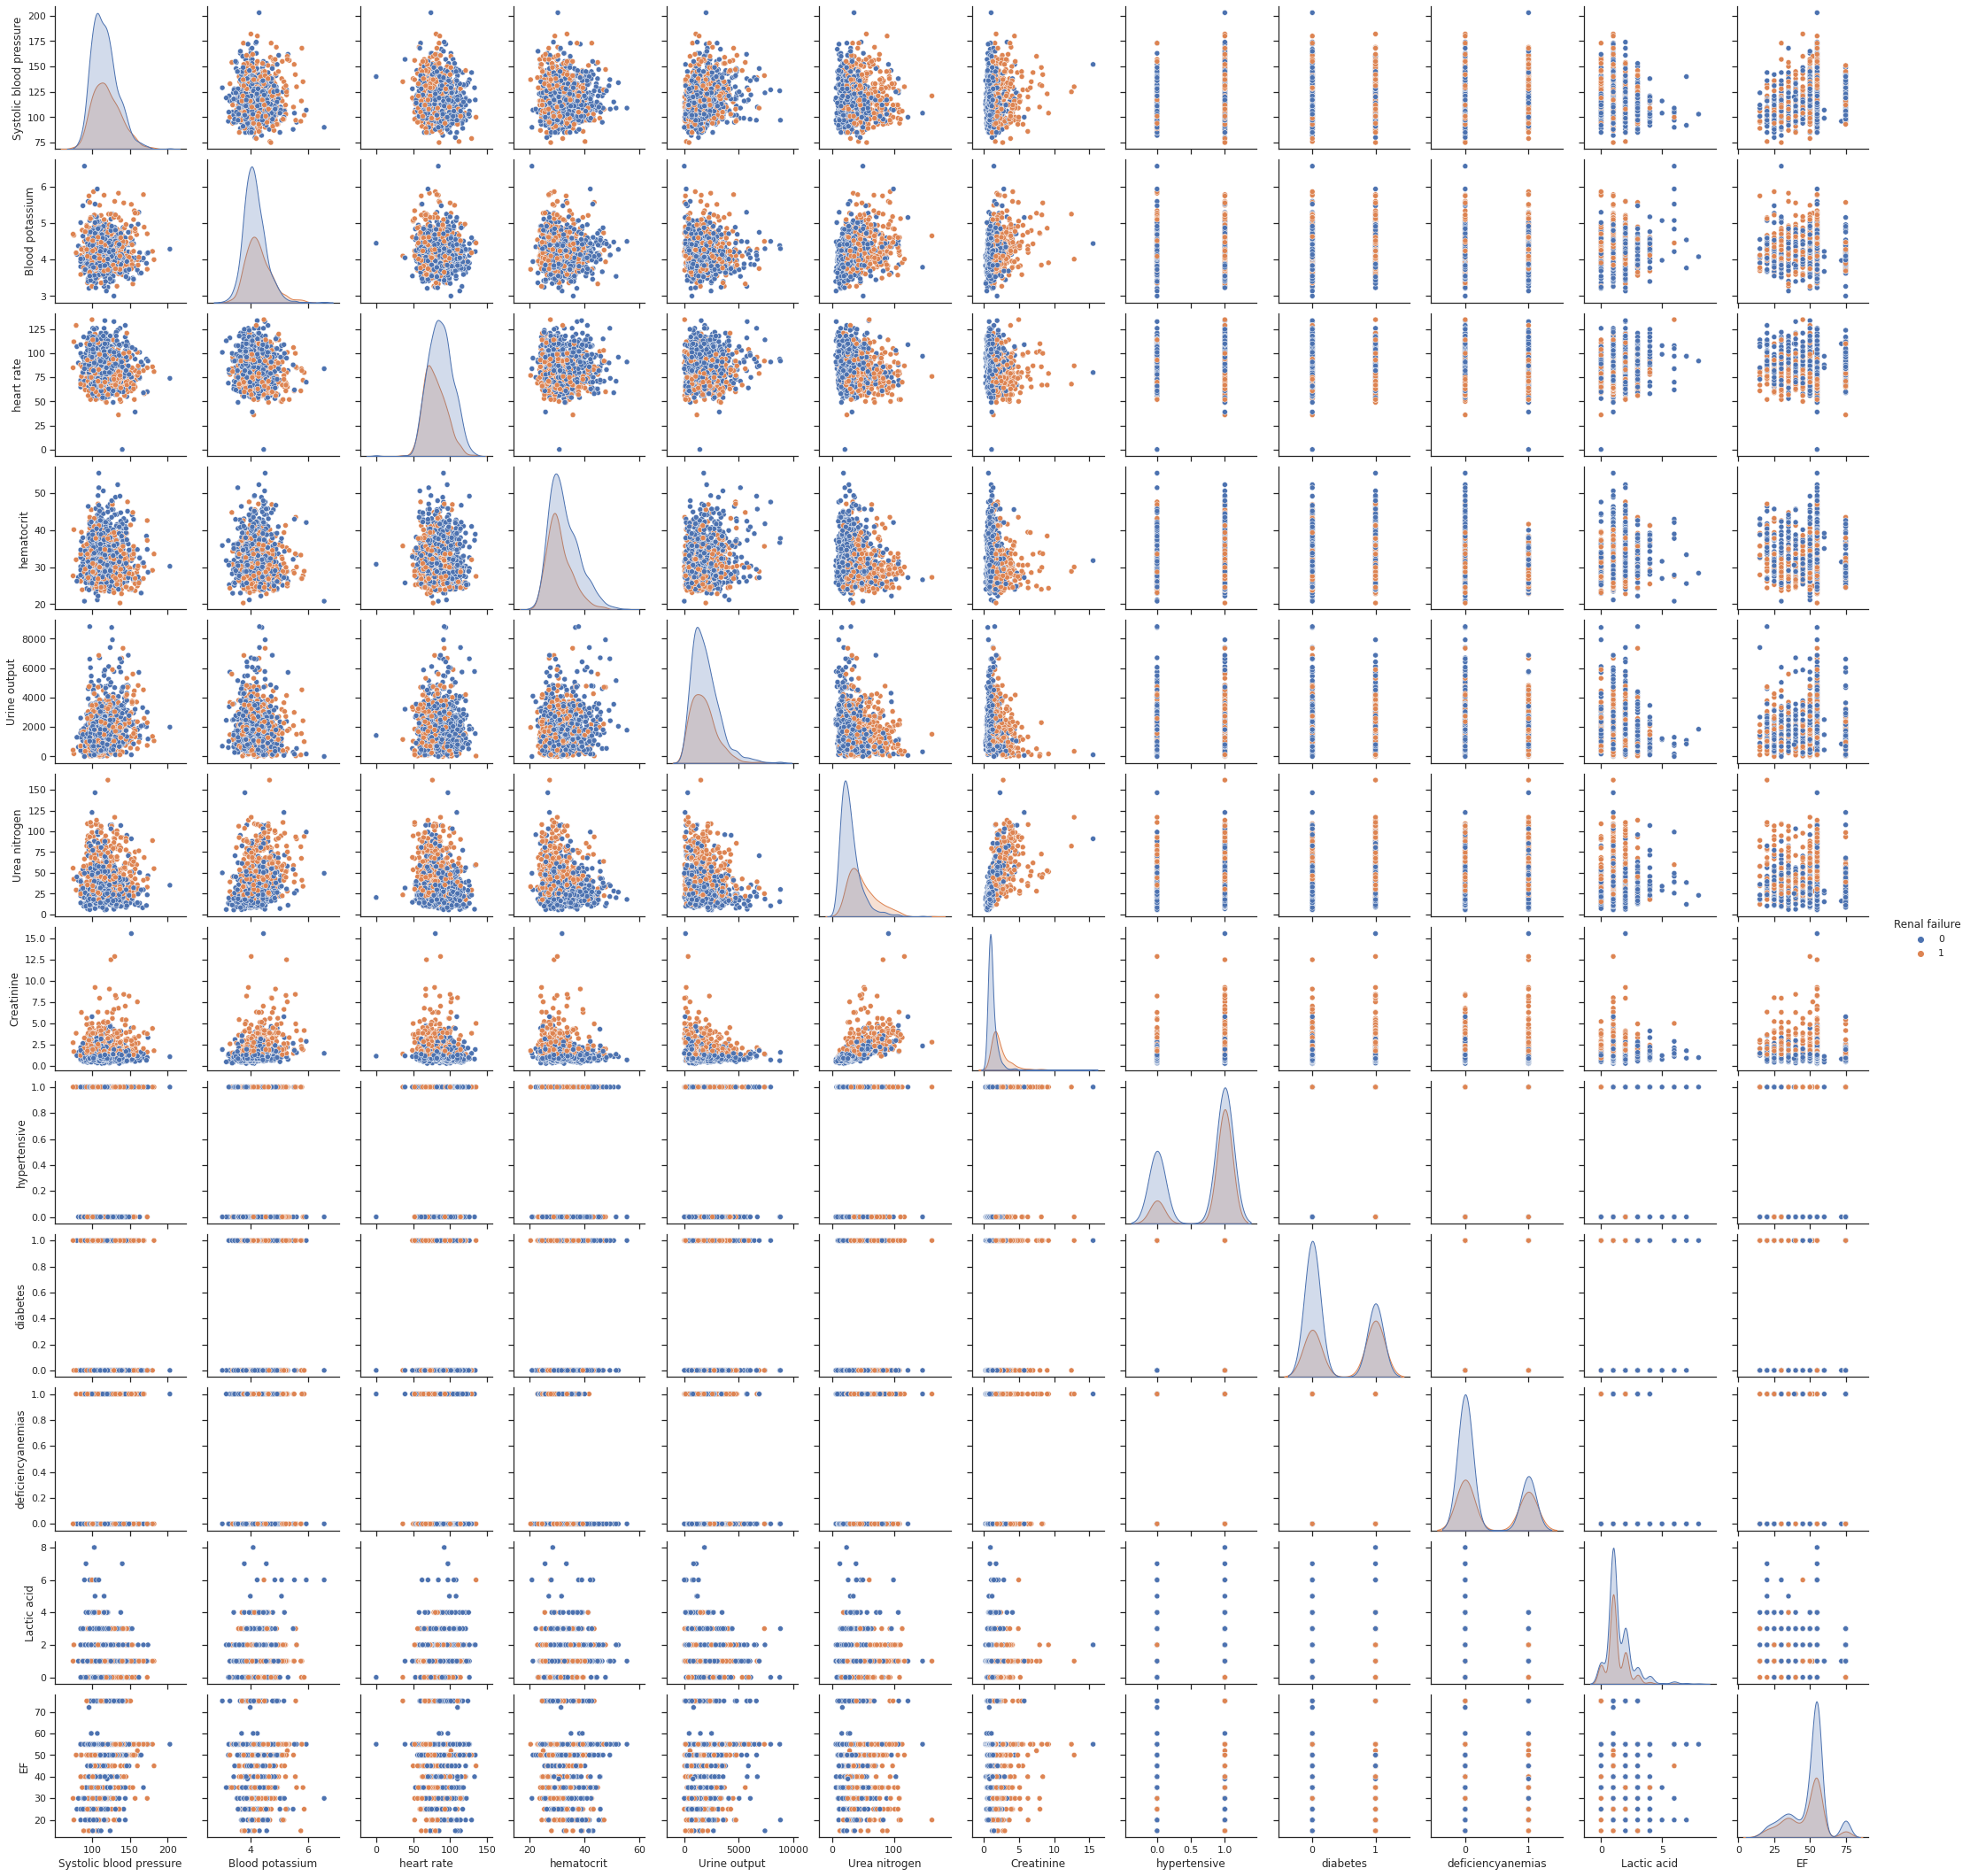

In [253]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df2, hue="Renal failure")
plt.show()

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
plt.rcParams["figure.figsize"]=12,8

In [227]:
sns.set(style="whitegrid")

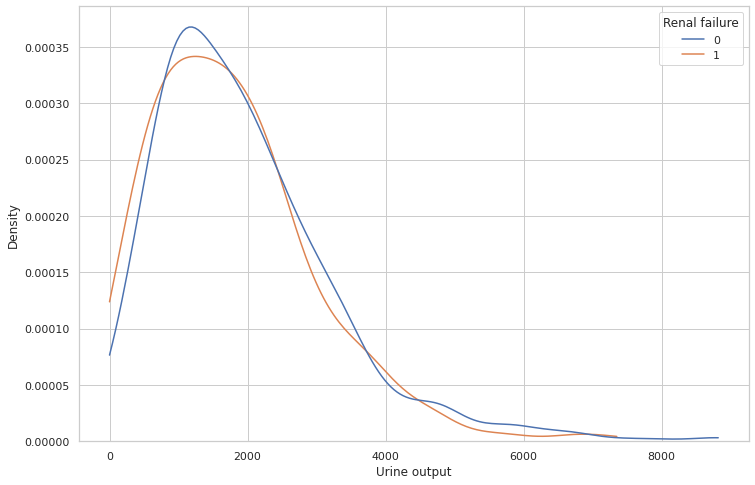

In [229]:
sns.kdeplot(data=df2, x="Urine output", hue="Renal failure", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

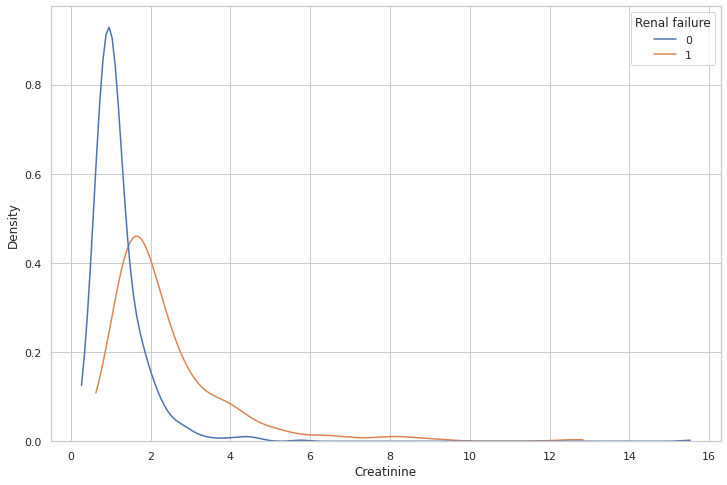

In [230]:
sns.kdeplot(data=df2, x="Creatinine", hue="Renal failure", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

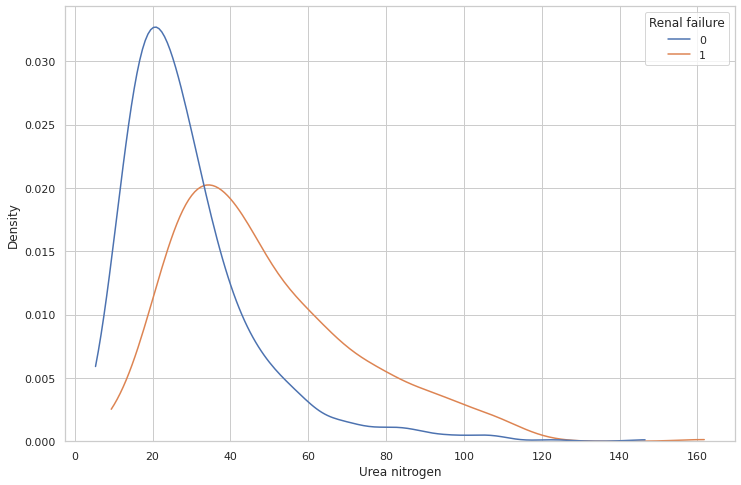

In [231]:
sns.kdeplot(data=df2, x="Urea nitrogen", hue="Renal failure", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

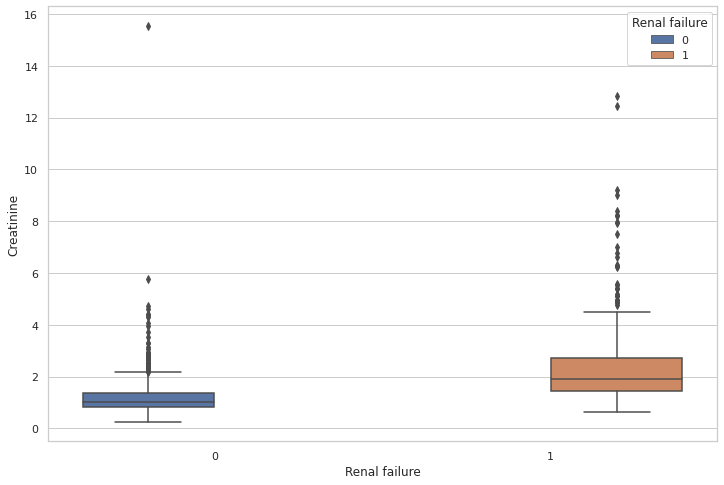

In [233]:
sns.boxplot(data=df2, x="Renal failure", y="Creatinine", hue="Renal failure")

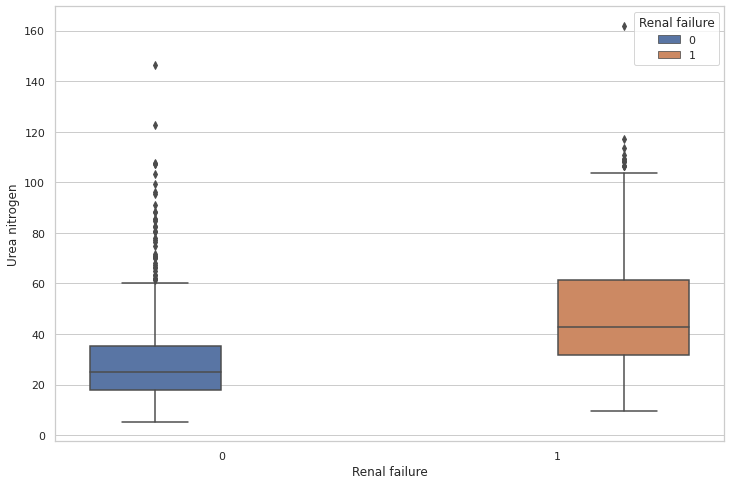

In [234]:
sns.boxplot(data=df2, x="Renal failure", y="Urea nitrogen", hue="Renal failure")